# Machine Learning Pipeline - Model Training with All Features

In this notebook, we will train a number of selected machine larening model with all the original features of the dataset and observe the difference in performance with evaluation results on the selected features.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

# to save the model
import joblib

# algorithms to build and train the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables
X_train = pd.read_csv('xtrain_unscaled.csv')
X_test = pd.read_csv('xtest_unscaled.csv')

In [3]:
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

# Feature Scaling

We have to scale our features because a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the original unit of the values. 

Since scaling is typically done to limit value between 0 and 1, we will exclude our binary features and focus on non-binary/discrete and continuous features. 

Let's grab the features that have more than 2 unique values:

In [4]:
# list out all the continuous variables that will be scaled
scaled = [feat for feat in X_train.columns if X_train[feat].nunique() > 2]
scaled

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [5]:
X_train[scaled].describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,53.518973,3.464286,3.560268,52662.753803,0.434710,0.512835,8.979353,49.256696,307.546317,26.065290,168.925781,37.761161,27.388393,44.244978,2.320871,4.094866,2.700893,5.830915,5.248884
std,12.001241,1.002430,1.470630,25832.016875,0.535903,0.541780,0.679210,28.926715,336.225269,39.546405,225.751744,55.005374,41.222468,51.603325,1.895143,2.775609,2.945975,3.246247,2.353110
min,26.000000,1.000000,1.000000,2447.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,3.000000,2.000000,35749.000000,0.000000,0.000000,9.000000,25.000000,24.000000,1.000000,16.000000,2.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,52.000000,3.000000,3.000000,52662.753803,0.000000,0.000000,9.000000,50.000000,184.000000,8.000000,67.000000,12.000000,8.000000,25.000000,2.000000,3.000000,2.000000,5.000000,6.000000
75%,63.000000,4.000000,5.000000,68655.500000,1.000000,1.000000,9.000000,74.000000,508.250000,33.000000,241.250000,50.000000,35.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,129.000000,5.000000,8.000000,666666.000000,2.000000,2.000000,10.000000,99.000000,1492.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


Notice the difference in the different scales of the variables. 

In [6]:
# load the scaler object
scaler = MinMaxScaler()

# fit the train set
scaler.fit(X_train[scaled])

# transform the train and test set
X_train[scaled] = scaler.transform(X_train[scaled])
X_test[scaled] = scaler.transform(X_test[scaled])

In [7]:
# display the scaled dataset
X_train[scaled].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.233010,0.50,0.285714,0.095207,0.0,0.5,0.0,0.545455,0.430295,0.070352,0.028406,0.000000,0.026718,0.177570,0.066667,0.333333,0.071429,0.692308,0.25
1,0.242718,0.25,0.428571,0.070264,0.0,0.0,1.0,0.909091,0.415550,0.271357,0.138551,0.382239,0.374046,0.370717,0.133333,0.333333,0.250000,0.769231,0.35
2,0.155340,1.00,0.714286,0.051722,0.5,0.0,0.0,0.232323,0.010724,0.005025,0.001159,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.230769,0.25
3,0.475728,1.00,0.142857,0.119128,0.0,0.0,0.0,0.898990,0.839142,0.000000,0.269565,0.177606,0.133588,0.000000,0.066667,0.148148,0.178571,0.615385,0.05
4,0.097087,0.50,0.142857,0.121324,0.5,0.0,0.0,0.828283,0.544236,0.497487,0.249855,0.915058,0.568702,0.102804,0.066667,0.407407,0.142857,0.769231,0.25


In [8]:
X_train[scaled].describe().round(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00,1792.00
mean,0.27,0.62,0.37,0.08,0.22,0.26,0.49,0.50,0.21,0.13,0.10,0.15,0.10,0.14,0.15,0.15,0.10,0.45,0.26
std,0.12,0.25,0.21,0.04,0.27,0.27,0.34,0.29,0.23,0.20,0.13,0.21,0.16,0.16,0.13,0.10,0.11,0.25,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.50,0.14,0.05,0.00,0.00,0.50,0.25,0.02,0.01,0.01,0.01,0.00,0.03,0.07,0.07,0.00,0.23,0.15
50%,0.25,0.50,0.29,0.08,0.00,0.00,0.50,0.51,0.12,0.04,0.04,0.05,0.03,0.08,0.13,0.11,0.07,0.38,0.30
75%,0.36,0.75,0.57,0.10,0.50,0.50,0.50,0.75,0.34,0.17,0.14,0.19,0.13,0.18,0.20,0.22,0.14,0.62,0.35
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Our variables now have a uniform scale.

# Model Training

To train the model, we will be trying the following learning approaches:

- Logistic Regression
- Decision Trees
- Random Forests
- Nearest Neighbors
- Support Vector Machines

Our metric of priority will be the f-1 score for the 'Y' label, i.e. the 1 class considering the imbalanced nature of the dataset.

In [9]:
# dictionary to store the f1 scores and accuracy scores of the models
f1_scores = {}
accuracy_scores = {}
precision_scores = {}
recall_scores = {}

## Logistic Regression

In [10]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train['Response'])
log_preds = log_model.predict(X_test)

f1_scores['log_model'] = f1_score(y_test,log_preds)
accuracy_scores['log_model'] = accuracy_score(y_test,log_preds)
precision_scores['log_model'] = precision_score(y_test,log_preds)
recall_scores['log_model'] = recall_score(y_test,log_preds)

print(confusion_matrix(y_test,log_preds))
print()
print(classification_report(y_test,log_preds))

[[361   7]
 [ 47  33]]

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       368
           1       0.82      0.41      0.55        80

    accuracy                           0.88       448
   macro avg       0.85      0.70      0.74       448
weighted avg       0.87      0.88      0.86       448



## Decision Trees

In [11]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train['Response'])
tree_preds = tree_model.predict(X_test)

f1_scores['tree_model'] = f1_score(y_test,tree_preds)
accuracy_scores['tree_model'] = accuracy_score(y_test,tree_preds)
precision_scores['tree_model'] = precision_score(y_test,tree_preds)
recall_scores['tree_model'] = recall_score(y_test,tree_preds)

print(confusion_matrix(y_test,tree_preds))
print()
print(classification_report(y_test,tree_preds))

[[334  34]
 [ 40  40]]

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       368
           1       0.54      0.50      0.52        80

    accuracy                           0.83       448
   macro avg       0.72      0.70      0.71       448
weighted avg       0.83      0.83      0.83       448



## Random Forest

In [12]:
forest_model = RandomForestClassifier(n_estimators=200,random_state=0)
forest_model.fit(X_train,y_train['Response'])
forest_preds = forest_model.predict(X_test)

f1_scores['forest_model'] = f1_score(y_test,forest_preds)
accuracy_scores['forest_model'] = accuracy_score(y_test,forest_preds)
precision_scores['forest_model'] = precision_score(y_test,forest_preds)
recall_scores['forest_model'] = recall_score(y_test,forest_preds)

print(confusion_matrix(y_test,forest_preds))
print()
print(classification_report(y_test,forest_preds))

[[365   3]
 [ 48  32]]

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       368
           1       0.91      0.40      0.56        80

    accuracy                           0.89       448
   macro avg       0.90      0.70      0.75       448
weighted avg       0.89      0.89      0.87       448



## Nearest Neighbors

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train['Response'])
knn_preds = knn_model.predict(X_test)

f1_scores['knn_model'] = f1_score(y_test,knn_preds)
accuracy_scores['knn_model'] = accuracy_score(y_test,knn_preds)
precision_scores['knn_model'] = precision_score(y_test,knn_preds)
recall_scores['knn_model'] = recall_score(y_test,knn_preds)

print(confusion_matrix(y_test,knn_preds))
print()
print(classification_report(y_test,knn_preds))

[[360   8]
 [ 49  31]]

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       368
           1       0.79      0.39      0.52        80

    accuracy                           0.87       448
   macro avg       0.84      0.68      0.72       448
weighted avg       0.86      0.87      0.85       448



## Support Vector Machines

In [14]:
svc_model = SVC()
svc_model.fit(X_train,y_train['Response'])
svc_preds = svc_model.predict(X_test)

f1_scores['svc_model'] = f1_score(y_test,svc_preds)
accuracy_scores['svc_model'] = accuracy_score(y_test,svc_preds)
precision_scores['svc_model'] = precision_score(y_test,svc_preds)
recall_scores['svc_model'] = recall_score(y_test,svc_preds)

print(confusion_matrix(y_test,svc_preds))
print()
print(classification_report(y_test,svc_preds))

[[364   4]
 [ 56  24]]

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       368
           1       0.86      0.30      0.44        80

    accuracy                           0.87       448
   macro avg       0.86      0.64      0.68       448
weighted avg       0.86      0.87      0.84       448



# Model Evaluation

Let's plot out the f1 scores and the accuracy scores from all our models:

Text(0.5, 1.0, 'Model Evaluation')

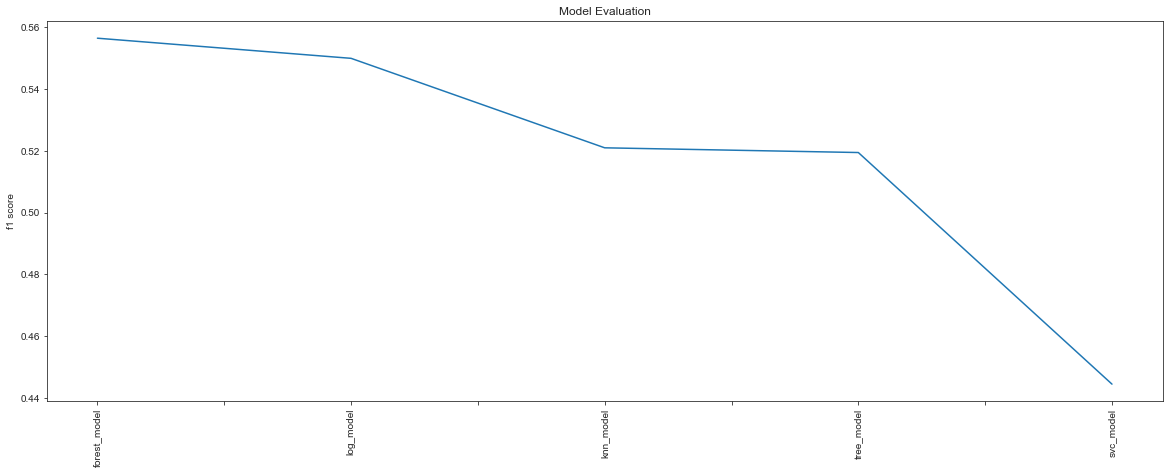

In [15]:
pd.Series(f1_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('f1 score')
plt.title('Model Evaluation')

Text(0.5, 1.0, 'Model Evaluation')

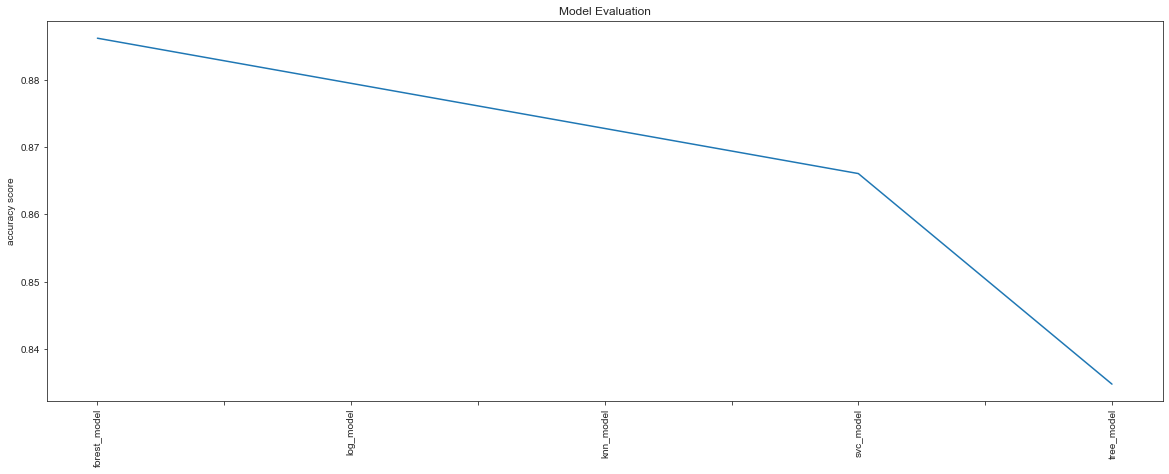

In [16]:
pd.Series(accuracy_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('accuracy score')
plt.title('Model Evaluation')

Text(0.5, 1.0, 'Model Evaluation')

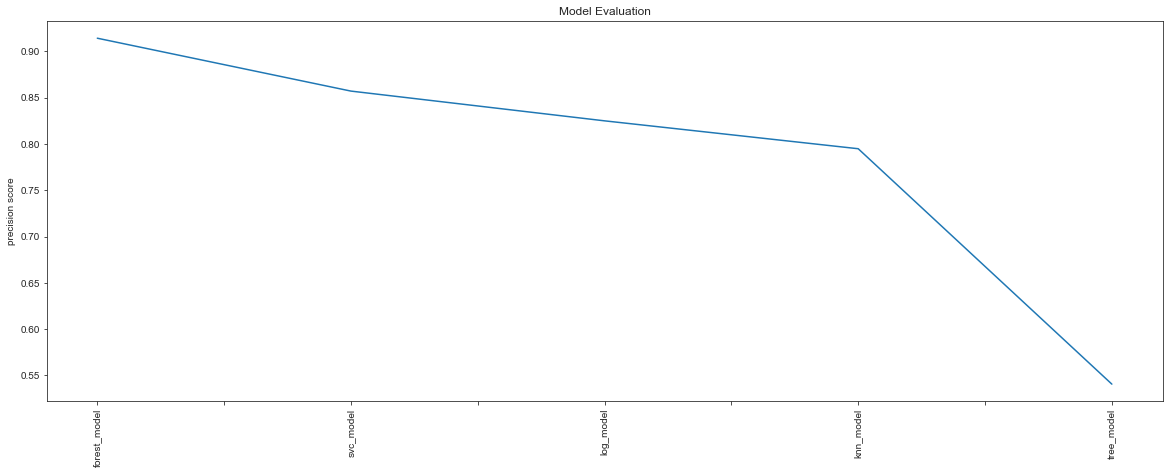

In [17]:
pd.Series(precision_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('precision score')
plt.title('Model Evaluation')

Text(0.5, 1.0, 'Model Evaluation')

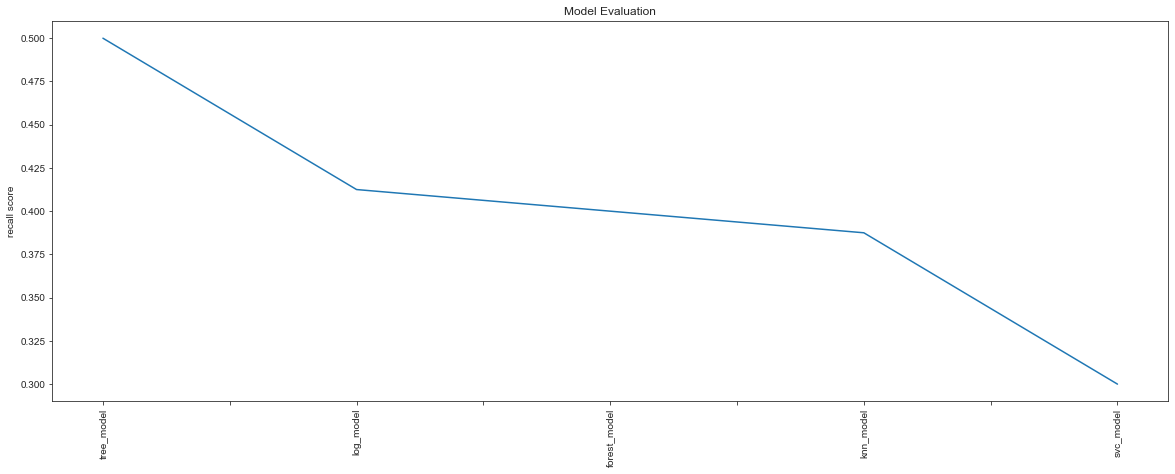

In [18]:
pd.Series(recall_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('recall score')
plt.title('Model Evaluation')

The f-1 scores have improved across all our models. We can probably atrribute this to the information gain from our added features. Recall that these features had really low p-values even though their size effects were not considerable. However, the effects were enough to improve prediction and model performance. This means the model was able to learn even from the undersized labels in the dataset. 

The issue with the data, however, is that we have a high proportion of NO labels across all the categorical and numerical features. The YES labels are proportionately higher only in some undersized labels and values. To correct this error, we can do the following:

- Update the minority class with more samples, if they are available... OR...
- Oversample the minority class, if the original samples we need aren't available.